# Acoustic Anomaly Detection based on Images with Azure AutoML for Images

## 2. Audio Statistics

<img src='https://github.com/retkowsky/CustomVision_Datasets/blob/master/anomaly.png?raw=true' width = 600>

<div class="alert alert-info"> <b> In this notebook We will generate some audio statistics</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 25-Oct-2022 | V3

In [1]:
#pip install librosa

In [2]:
#pip install audio_metadata

In [3]:
import audio_metadata
import datetime
import matplotlib.pyplot as plt
import librosa, librosa.display, IPython.display as ipd
import numpy as np
import os
import os.path
import time
import seaborn
import glob
import shutil
import urllib.request
import pandas as pd
import sys
import wave

from datetime import datetime
from scipy.io import wavfile as wav
from zipfile import ZipFile
from pathlib import Path

%matplotlib inline

In [4]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [6]:
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2022-10-25 12:55:26


In [7]:
def audio_metadata(audiofile):
    """
    Generation audio metadata
    """
    import os.path
    import time
    import audio_metadata

    lastmodifdate = time.ctime(os.path.getmtime(audiofile))
    creationdate = time.ctime(os.path.getctime(audiofile))
    audiofilemetadata = audio_metadata.load(audiofile)
    audioformat = audiofilemetadata['streaminfo']['audio_format']
    bitdepth = audiofilemetadata['streaminfo']['bit_depth']
    bitrate = audiofilemetadata['streaminfo']['bitrate']
    nbchannels = audiofilemetadata['streaminfo']['channels']
    duration = audiofilemetadata['streaminfo']['duration']
    samplerate = audiofilemetadata['streaminfo']['sample_rate']
    audiofilesize = audiofilemetadata['filesize']

    print("===== Audio Statistics =====\n")
    print("Audio File:\t", audiofile)
    print("Modified Date:\t", lastmodifdate)
    print("Creation Date:\t", creationdate)
    print("File Size:\t", audiofilesize)
    print("Audio Format:\t", audioformat)
    print("Bit Depth:\t", bitdepth)
    print("Bit Rate:\t", bitrate)
    print("Sampling Rate:\t", samplerate)
    print("Nb of Channels:\t", nbchannels)
    print("Duration:\t", duration)
    print()
    return {
        'audiofile': audiofile,
        'lastmodifdate': lastmodifdate,
        'creationdate': creationdate,
        'audiofilesize': audiofilesize,
        'audioformat': audioformat,
        'bitdepth': bitdepth,
        'bitrate': bitrate,
        'samplerate': samplerate,
        'nbchannels': nbchannels,
        'duration': duration
    }

In [8]:
def dir_files(mypath):
    """
    List of files from a dir
    """
    print("Total of files in", mypath, "=",
          sum(len(files) for _, _, files in os.walk(mypath)), '\n')

    for root, _, files in os.walk(mypath):
        print(root, ":", len(files), "files")

In [9]:
dir_files("audio_samples/")

Total of files in audio_samples/ = 122 

audio_samples/ : 0 files
audio_samples/KO : 61 files
audio_samples/OK : 61 files


In [10]:
dfaudio = pd.DataFrame(columns=[
    "AudioFilePath", "SubDir", "AudioFile", "CategoryWav", "ModifiedDate",
    "CreationDate", "FileSize", "AudioFormat", "BitDepth", "BitRate",
    "SamplingRate", "NbChannels", "Duration"
])

In [13]:
def df_audio_creation(wavdir):
    """
    dataframe generation with audio metadata
    """
    nbfiles = 1
    for roots, directories, files in os.walk(wavdir, topdown=False):

        for file in files:
            if file.endswith('.wav'):

                wavfilelocation = roots + '/' + file
                catwav = os.path.basename(os.path.normpath(roots))
                subd = Path(roots)
                subdir = subd.parts[1]
                result = audio_metadata(wavfilelocation)

                dfaudio.at[nbfiles, 'AudioFilePath'] = wavfilelocation
                dfaudio.at[nbfiles, 'SubDir'] = subdir
                dfaudio.at[nbfiles, 'AudioFile'] = file
                dfaudio.at[nbfiles, 'CategoryWav'] = catwav
                dfaudio.at[nbfiles, 'ModifiedDate'] = result['lastmodifdate']
                dfaudio.at[nbfiles, 'CreationDate'] = result['creationdate']
                dfaudio.at[nbfiles, 'FileSize'] = result['audiofilesize']
                dfaudio.at[nbfiles, 'AudioFormat'] = result['audioformat']
                dfaudio.at[nbfiles, 'BitDepth'] = result['bitdepth']
                dfaudio.at[nbfiles, 'BitRate'] = result['bitrate']
                dfaudio.at[nbfiles, 'SamplingRate'] = result['samplerate']
                dfaudio.at[nbfiles, 'NbChannels'] = result['nbchannels']
                dfaudio.at[nbfiles, 'Duration'] = result['duration']
                nbfiles += 1

    dfaudio['FileSize'] = dfaudio['FileSize'].astype(int, errors='raise')
    dfaudio['BitDepth'] = dfaudio['BitDepth'].astype(int, errors='raise')
    dfaudio['BitRate'] = dfaudio['BitRate'].astype(float, errors='raise')
    dfaudio['SamplingRate'] = dfaudio['SamplingRate'].astype(float,
                                                             errors='raise')
    dfaudio['NbChannels'] = dfaudio['NbChannels'].astype(int, errors='raise')
    dfaudio['Duration'] = dfaudio['Duration'].astype(float, errors='raise')

    print("\n ===== Number of files analyzed =", nbfiles - 1, '=====')

In [14]:
df_audio_creation('audio_samples/KO')

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_1.wav
Modified Date:	 Tue Oct 25 12:54:02 2022
Creation Date:	 Tue Oct 25 12:54:02 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_10.wav
Modified Date:	 Tue Oct 25 12:54:03 2022
Creation Date:	 Tue Oct 25 12:54:03 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_11.wav
Modified Date:	 Tue Oct 25 12:54:03 2022
Creation Date:	 Tue Oct 25 12:54:03 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_12.wav
Modif

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_35.wav
Modified Date:	 Tue Oct 25 12:54:07 2022
Creation Date:	 Tue Oct 25 12:54:07 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_36.wav
Modified Date:	 Tue Oct 25 12:54:07 2022
Creation Date:	 Tue Oct 25 12:54:07 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_37.wav
Modified Date:	 Tue Oct 25 12:54:07 2022
Creation Date:	 Tue Oct 25 12:54:07 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_38.wav
Modi

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_60.wav
Modified Date:	 Tue Oct 25 12:54:11 2022
Creation Date:	 Tue Oct 25 12:54:11 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_61.wav
Modified Date:	 Tue Oct 25 12:54:11 2022
Creation Date:	 Tue Oct 25 12:54:11 2022
File Size:	 665776
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 3.7739909297052154

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_KO_7.wav
Modified Date:	 Tue Oct 25 12:54:03 2022
Creation Date:	 Tue Oct 25 12:54:03 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/KO/machine_K

In [15]:
dfaudioKO = dfaudio

In [16]:
dfaudioKO.shape

(61, 13)

In [17]:
dfaudioKO.head()

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,audio_samples/KO/machine_KO_1.wav,KO,machine_KO_1.wav,KO,Tue Oct 25 12:54:02 2022,Tue Oct 25 12:54:02 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
2,audio_samples/KO/machine_KO_10.wav,KO,machine_KO_10.wav,KO,Tue Oct 25 12:54:03 2022,Tue Oct 25 12:54:03 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
3,audio_samples/KO/machine_KO_11.wav,KO,machine_KO_11.wav,KO,Tue Oct 25 12:54:03 2022,Tue Oct 25 12:54:03 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
4,audio_samples/KO/machine_KO_12.wav,KO,machine_KO_12.wav,KO,Tue Oct 25 12:54:04 2022,Tue Oct 25 12:54:04 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
5,audio_samples/KO/machine_KO_13.wav,KO,machine_KO_13.wav,KO,Tue Oct 25 12:54:04 2022,Tue Oct 25 12:54:04 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0


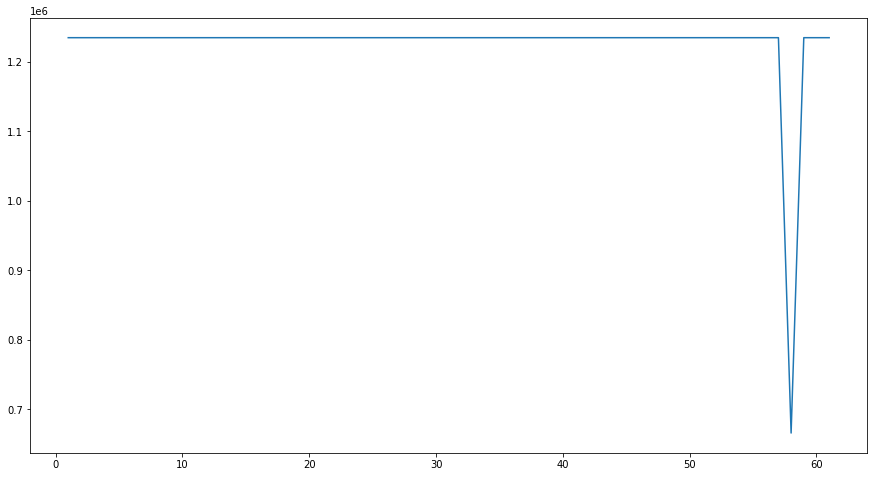

In [18]:
dfaudioKO["FileSize"].plot(figsize=(15, 8))

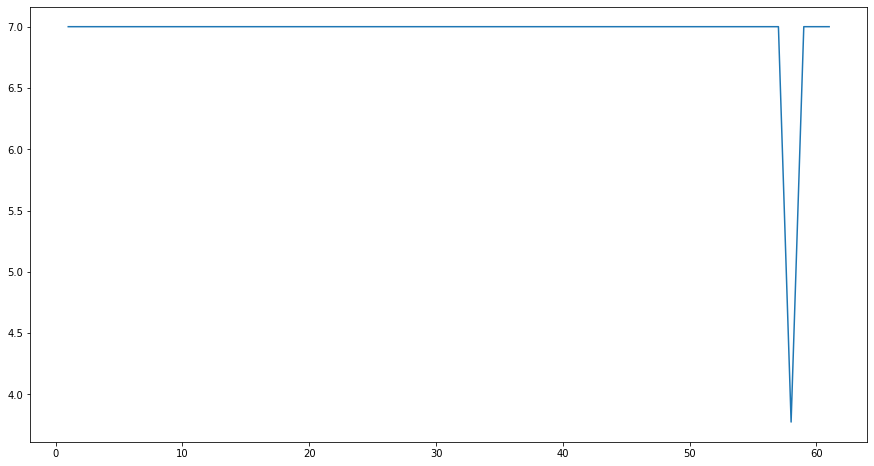

In [19]:
dfaudioKO["Duration"].plot(figsize=(15, 8))

In [20]:
del dfaudio

In [21]:
dfaudio = pd.DataFrame(columns=[
    "AudioFilePath", "SubDir", "AudioFile", "CategoryWav", "ModifiedDate",
    "CreationDate", "FileSize", "AudioFormat", "BitDepth", "BitRate",
    "SamplingRate", "NbChannels", "Duration"
])

In [23]:
df_audio_creation('audio_samples/OK')

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_1.wav
Modified Date:	 Tue Oct 25 12:53:50 2022
Creation Date:	 Tue Oct 25 12:53:50 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_10.wav
Modified Date:	 Tue Oct 25 12:53:51 2022
Creation Date:	 Tue Oct 25 12:53:51 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_11.wav
Modified Date:	 Tue Oct 25 12:53:51 2022
Creation Date:	 Tue Oct 25 12:53:51 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_12.wav
Modif

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_34.wav
Modified Date:	 Tue Oct 25 12:53:54 2022
Creation Date:	 Tue Oct 25 12:53:54 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_35.wav
Modified Date:	 Tue Oct 25 12:53:54 2022
Creation Date:	 Tue Oct 25 12:53:54 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_36.wav
Modified Date:	 Tue Oct 25 12:53:54 2022
Creation Date:	 Tue Oct 25 12:53:54 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_37.wav
Modi

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_59.wav
Modified Date:	 Tue Oct 25 12:53:57 2022
Creation Date:	 Tue Oct 25 12:53:57 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_6.wav
Modified Date:	 Tue Oct 25 12:53:50 2022
Creation Date:	 Tue Oct 25 12:53:50 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_60.wav
Modified Date:	 Tue Oct 25 12:53:57 2022
Creation Date:	 Tue Oct 25 12:53:57 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 audio_samples/OK/machine_OK_61.wav
Modif

In [24]:
dfaudioOK = dfaudio

In [25]:
dfaudioOK.shape

(61, 13)

## All files analysis

In [26]:
print(dfaudioKO.shape)
print(dfaudioOK.shape)

(61, 13)
(61, 13)


In [27]:
dfaudioall = pd.concat([dfaudioKO, dfaudioOK])

In [28]:
dfaudioall.shape

(122, 13)

In [29]:
dfaudioall.head()

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,audio_samples/KO/machine_KO_1.wav,KO,machine_KO_1.wav,KO,Tue Oct 25 12:54:02 2022,Tue Oct 25 12:54:02 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
2,audio_samples/KO/machine_KO_10.wav,KO,machine_KO_10.wav,KO,Tue Oct 25 12:54:03 2022,Tue Oct 25 12:54:03 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
3,audio_samples/KO/machine_KO_11.wav,KO,machine_KO_11.wav,KO,Tue Oct 25 12:54:03 2022,Tue Oct 25 12:54:03 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
4,audio_samples/KO/machine_KO_12.wav,KO,machine_KO_12.wav,KO,Tue Oct 25 12:54:04 2022,Tue Oct 25 12:54:04 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
5,audio_samples/KO/machine_KO_13.wav,KO,machine_KO_13.wav,KO,Tue Oct 25 12:54:04 2022,Tue Oct 25 12:54:04 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0


(61, 13)


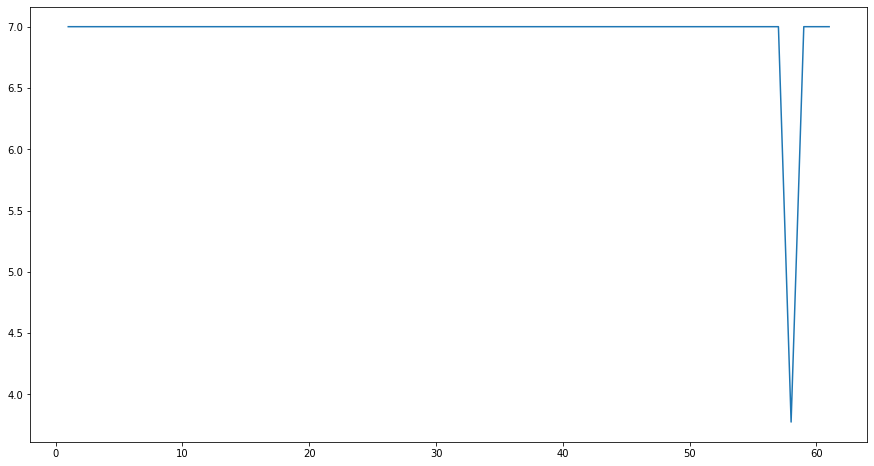

In [30]:
df = dfaudioall[(dfaudioall.SubDir == "KO")]
print(df.shape)
df["Duration"].plot(figsize=(15, 8))

del df

(61, 13)


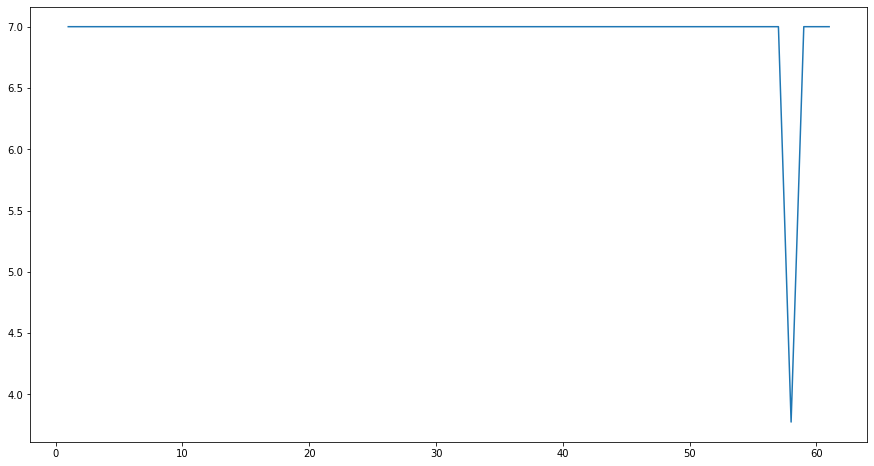

In [31]:
df = dfaudioall[(dfaudioall.SubDir == "OK") & (dfaudioall.Duration > 1)]
print(df.shape)
df["Duration"].plot(figsize=(15, 8))

del df

In [33]:
RESULTS_DIR = 'results'

if os.path.isdir(RESULTS_DIR) == True:
    print("Directory", RESULTS_DIR, "exists. So let's use it.")
    
if os.path.isdir(RESULTS_DIR) == False:
    print("Directory not exists. Creating directory... ", RESULTS_DIR)
    os.mkdir(RESULTS_DIR)
    print("Done.")

Directory not exists. Creating directory...  results
Done.


In [34]:
dfaudioall.to_csv(RESULTS_DIR + '/audio_statistics.csv')

In [35]:
from IPython.display import FileLink

AUDIOSTATS_LINK = FileLink(path=RESULTS_DIR + '/audio_statistics.csv')
print("Click to download the file:")
AUDIOSTATS_LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/standardd13v2/code/Users/seretkow/Sound/MachineSoundAnomaly/results/audio_statistics.csv

> End. You can go to the next notebook

Note: All these Python notebooks were made for demo purposes. They were not designed for production usage. Some feature can be currently in public preview. This preview version is provided without a service-level agreement. Certain features might not be supported or might have constrained capabilities. For more information, see Supplemental Terms of Use for Microsoft Azure Previews. https://azure.microsoft.com/en-us/support/legal/preview-supplemental-terms/